In [2]:
import pandas as pd
import numpy as np
import requests
from time import time
from matplotlib import pyplot as plt
%matplotlib inline
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk import FreqDist
from nltk.util import ngrams
from nltk.tag import pos_tag
import seaborn as sns

In [3]:
dataset  = pd.read_csv('why_stopped.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
dataset.head()

C:\Users\carol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,nct_id,study_type,phase,start_month_year,primary_completion_month_year,has_dmc,overall_status,official_title,brief_title,why_stopped,...,keywords_name,enrollment,enrollment_index,enrollment_bins,minimum_age,minimum_age_years,minimum_age_int,minimum_age_bins,maximum_age,stopped
0,NCT02330146,Interventional,Phase 1/Phase 2,44331,44546,TRUE,Terminated,"A Randomized, Double-blind, Placebo-controlled...",Safety and Efficacy of RCT-01 in Men and Women...,no reason,...,not_provided,8,8,VLOW,18 Years,18 Years,18,Youth,65 Years,stopped
1,NCT02632279,Interventional,Not_Provided,44515,44517,FALSE,Terminated,Tryptophan Depletion in Parkinson's Disease Pa...,Tryptophan Depletion in PD Patients Treated Wi...,no reason,...,Deep Brain Stimulation$$Parkinson's disease$$S...,7,7,VLOW,no_criteria,no_criteria Years,no_criteria,nocriteria,no_criteria,stopped
2,NCT04528927,Interventional,Phase 3,43966,44027,TRUE,Withdrawn,Evaluation of the Efficacy and Safety of Treat...,Evaluation of the Efficacy and Safety of Treat...,no reason,...,not_provided,0,0,VLOW,18 Years,18 Years,18,Youth,80 Years,stopped
3,NCT04349228,Interventional,Phase 3,43949,44027,TRUE,Withdrawn,Assessment of the Efficacy and Safety of Hydro...,Assessment of the Efficacy and Safety of (HCQ)...,no reason,...,COVID19$$HCQ$$Healthcare Worker$$Hydroxychloro...,0,0,VLOW,18 Years,18 Years,18,Youth,65 Years,stopped
4,NCT01315158,Interventional,Not_Provided,44207,44391,TRUE,Terminated,Incidence of Sedation Related Complications Wi...,Propofol vs Propofol + Benzo/Opiates in High R...,no reason,...,Body Mass Index$$Obstructive Sleep Apnea,36,36,VLOW,18 Years,18 Years,18,Youth,no_criteria,stopped


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13019 entries, 0 to 13018
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   nct_id                         13019 non-null  object
 1   study_type                     13019 non-null  object
 2   phase                          13019 non-null  object
 3   start_month_year               13019 non-null  object
 4   primary_completion_month_year  13019 non-null  object
 5   has_dmc                        13019 non-null  object
 6   overall_status                 13019 non-null  object
 7   official_title                 13019 non-null  object
 8   brief_title                    13019 non-null  object
 9   why_stopped                    13019 non-null  object
 10  enrollment_type                13019 non-null  object
 11  study_first_submitted_date     13019 non-null  object
 12  results_first_posted_date      13019 non-null  object
 13  n

In [31]:
all_words=[]
stop_words=stopwords.words('english')
for sent in dataset['why_stopped'].str.lower():
    if type(sent)!=float:
        for word in word_tokenize(sent):
            if word not in stop_words:
                all_words.append(word)

In [32]:
dist=FreqDist(all_words)

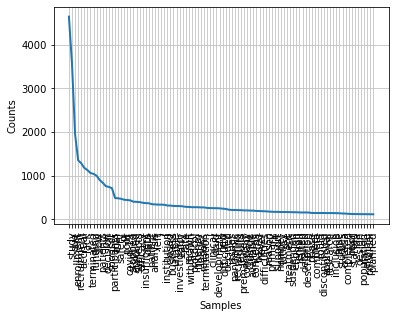

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
dist.plot(100)

In [34]:
lis=[]
for sent in  dataset['why_stopped'].str.lower():
    if type(sent)!=float:
        lis.append(sent)

In [35]:
n_grams=[]
words=[]
for sent in lis:
    for word in sent.lower().split():
        if word not in stop_words:
            words.append(word)
for tup in ngrams(words,2):
        n_grams.append(tup)

In [36]:
n_grams_dist=FreqDist(n_grams)

In [37]:
word_pos=[]
for sent in lis:
    pl=pos_tag(sent.split())
    for index in range(len(pl)):
        if pl[index][1]=='JJ':
            if index<len(pl)-1:
                word_pos.append(pl[index][0]+' '+pl[index+1][0])

In [38]:
n_grams_dist_jj=FreqDist(word_pos)

In [39]:
n_grams_dist_jj.most_common(100)

[('due to', 1932),
 ('unable to', 295),
 ('slow accrual', 284),
 ('low accrual', 216),
 ('low enrollment', 159),
 ('interim analysis', 147),
 ('poor accrual', 137),
 ('slow recruitment', 116),
 ('low recruitment', 114),
 ('slow enrollment', 114),
 ('principal investigator', 99),
 ('detailed description.', 95),
 ('poor recruitment', 84),
 ('covid-19 pandemic', 82),
 ('poor enrollment', 82),
 ('able to', 67),
 ('insufficient recruitment', 57),
 ('insufficient enrollment', 54),
 ('detailed description', 48),
 ('enough patients', 47),
 ('primary endpoint', 46),
 ('difficult to', 46),
 ('eligible patients', 43),
 ('accrual rate', 42),
 ('covid-19 pandemic.', 38),
 ('slow accrual.', 36),
 ('early termination', 36),
 ('low enrollment.', 34),
 ('administrative reasons', 33),
 ('clinical trial', 33),
 ('accrual and', 32),
 ('low accrual.', 30),
 ('study drug', 30),
 ('financial support', 29),
 ('clinical development', 29),
 ('insufficient accrual', 29),
 ('adverse events', 28),
 ('patient popul

In [40]:
word_pos_3=[]
for sent in lis:
    words_nostop=[]
    for word in sent.split():
        if word not in stop_words:
             words_nostop.append(word)
    pl=pos_tag(words_nostop)
    for index in range(len(pl)):
        if pl[index][1]=='JJ':
            if index<len(pl)-2:
                word_pos_3.append(pl[index][0]+' '+pl[index+1][0]+' '+pl[index+2][0])

In [41]:
n_grams_dist_jj_3=FreqDist(word_pos_3)
n_grams_dist_jj_3.most_common(1000)

[('due slow accrual', 46),
 ('principal investigator left', 46),
 ('due low enrollment', 33),
 ('due poor accrual', 32),
 ('due covid-19 pandemic', 32),
 ('due lack efficacy', 31),
 ('low recruitment rate', 30),
 ('due slow recruitment', 29),
 ('due slow enrollment', 28),
 ('due lack funding', 28),
 ('due slow accrual.', 27),
 ('due low accrual', 26),
 ('due covid-19 pandemic.', 25),
 ('interim analysis showed', 25),
 ('due low enrollment.', 22),
 ('low accrual rate', 21),
 ('due poor accrual.', 20),
 ('detailed description termination', 18),
 ('due lack efficacy.', 16),
 ('due lack accrual', 15),
 ('due lack funding.', 15),
 ('due safety concerns.', 15),
 ('early termination due', 15),
 ('due low recruitment', 14),
 ('due slow enrollment.', 14),
 ('resume; participants longer', 13),
 ('due covid-19 expected', 13),
 ('unable recruit patients', 12),
 ('early due lack', 12),
 ('due low accrual.', 12),
 ('early due slow', 12),
 ('slow recruitment rate', 12),
 ('prematurely, prior enrollme

In [42]:
for sent in lis:
    if sent.find('potential')!=-1 and sent.find('difficult')!=-1:
        print(sent)

difficulty in accrual of study subjects, small numbers of potential subjects


In [43]:
r=RegexpTokenizer(r'[A-Za-z]+')

In [44]:
n_grams=[]
words=[]
for sent in lis:
    for word in r.tokenize(sent.lower()):
        if word not in stop_words:
            words.append(word)
for tup in ngrams(words,3):
        n_grams.append(tup)

In [45]:
fd=FreqDist(n_grams)
fd.most_common(1000)

[(('slow', 'accrual', 'slow'), 277),
 (('accrual', 'slow', 'accrual'), 277),
 (('study', 'terminated', 'due'), 194),
 (('lack', 'funding', 'lack'), 171),
 (('funding', 'lack', 'funding'), 169),
 (('low', 'accrual', 'low'), 168),
 (('accrual', 'low', 'accrual'), 167),
 (('decision', 'sponsor', 'decision'), 136),
 (('sponsor', 'decision', 'sponsor'), 135),
 (('detailed', 'description', 'see'), 120),
 (('lack', 'enrollment', 'lack'), 113),
 (('enrollment', 'lack', 'enrollment'), 111),
 (('pi', 'left', 'institution'), 109),
 (('see', 'termination', 'reason'), 104),
 (('description', 'see', 'termination'), 103),
 (('termination', 'reason', 'detailed'), 103),
 (('reason', 'detailed', 'description'), 103),
 (('slow', 'enrollment', 'slow'), 100),
 (('enrollment', 'slow', 'enrollment'), 100),
 (('study', 'terminated', 'early'), 96),
 (('enrollment', 'low', 'enrollment'), 90),
 (('funding', 'funding', 'funding'), 90),
 (('participants', 'enrolled', 'participants'), 89),
 (('low', 'enrollment', '

In [46]:
reasons={
    'Insufficient Enrollment':['enrol','recruit','inclusion','candidate','subject','patient','participa'],
    'Due to COVID':['pandemic','covid'],
    'Interim analysis':['interim'],
    'Slow Accural':['accural','accrual'],
    'Lack of efficacy':['efficacy'],
    'Early Termination Date':['early'],
    'Pricipal Investigator Left':['investigator'],
    'Funding':['fund','financ'],
    'Preliminary':['preliminary'],
    'Company Decision(s)':['decision', 'administra', 'company'],
    'Technical Issues':['technical', 'issue'],
    'Insufficient data':['data',],
    'Safety Concern':['safety', 'adverse', 'health'],
    'Study Not Started':['not started'],
    'No Reason Stated':['not stated'],
    'Halted Prematurely':['prematurely'],
    'Other':['descript','acquisition','reason']
}

In [47]:
data_reasons=dict()

In [48]:
for reason in reasons.keys():
    data_reasons[reason]=np.zeros(len(dataset))

In [49]:
for index in range(len(dataset)):
    sent=dataset.loc[index,'why_stopped']
    if type(sent)!=float:
        for word in r.tokenize(sent.lower()):
            for reason in reasons.keys():
                for val in reasons[reason]:
                    if word.find(val)==0:
                        data_reasons[reason][index]=1

In [50]:
data_reasons=pd.DataFrame(data_reasons)

C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Clincal Trials Stopped Reason'}>

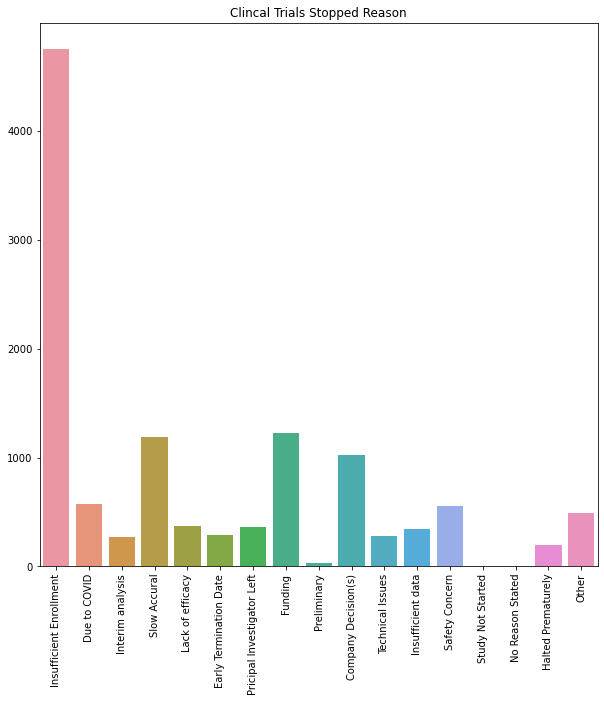

In [51]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.title('Clincal Trials Stopped Reason')
sns.barplot(data_reasons.sum().index,data_reasons.sum().values)

In [28]:
categories={
    'Neutral':['Insufficient Enrollment','Pricipal Investigator Left','Preliminary','Other', 'Study Not Started',
               'Due to COVID', 'Early Termination Date', 'Interim analysis'],
    'Possibly Negative':['Slow Accural','Company Decision(s)','Funding', 'Lack of efficacy', 'Insufficient data'],
    'Negative Efficacy':['Technical Issues', 'Safety Concern']
}

In [29]:
data_categories=dict()
counts=data_reasons.sum()
for category in categories.keys():
    data_categories[category]=0
for category in categories.keys():
    c=0;
    for val in categories[category]:
        c+=counts[val]
    data_categories[category]=c

C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Clinical Study Termination Categories'}>

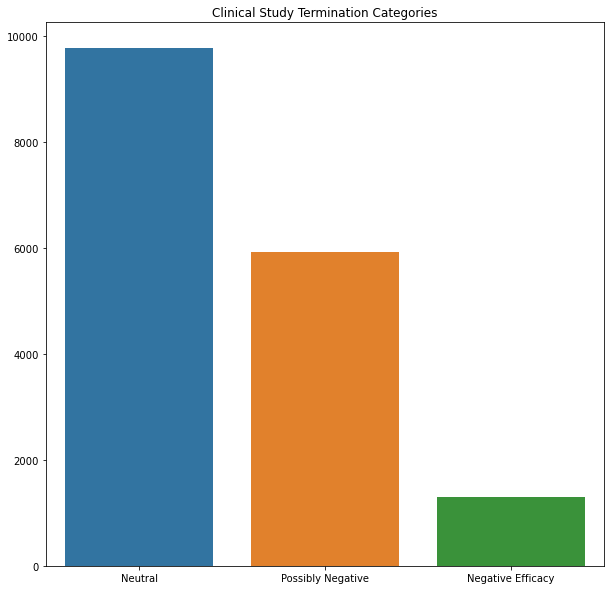

In [31]:
data_categories=pd.Series(data_categories)
plt.figure(figsize=(10,10))
plt.title('Clinical Study Termination Categories')
sns.barplot(data_categories.index,data_categories.values)

In [54]:
#https://github.com/shubh809/-Termination-Analysis-on-Terminated-Clinical-Trials


In [42]:
import pandas as pd
from collections import OrderedDict
import re


In [49]:
import spacy


AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

In [34]:
dataset.head()

,nct_id,study_type,phase,start_month_year,primary_completion_month_year,has_dmc,overall_status,official_title,brief_title,why_stopped,...,Agency_Class_Lead,lead_or_collaborator,subjects_affected_binary,subjects_at_risk_binary,responsible_party_type,keywords_name,enrollment_bins,minimum_age_bins,maximum_age_bins,stopped
0,NCT04163796,Interventional,Not_Provided,1-Aug-18,30-Oct-21,TRUE,Recruiting,Evaluation of an Upright Powered Wheelchair fo...,UPnRIDE Power Standing Wheelchair for SCI,not stopped/ not stated,...,Other,lead,FALSE,FALSE,Principal Investigator,not_provided,VLOW,Youth,Seniors,not stopped/ not stated
1,NCT03264222,Interventional,Not_Provided,1-May-17,18-Sep,FALSE,Unknown status,Safety of a New Security Device in Patients Wi...,Safety of a New Security Device in Patients Wi...,not stopped/ not stated,...,Other,collaborator$$lead,FALSE,FALSE,Sponsor,not_provided,VLOW,Youth,no_criteria,not stopped/ not stated
2,NCT02118870,Interventional,Phase 4,10-Jun-14,17-Sep,TRUE,Completed,Randomized Evaluation of Short-term DUal Anti ...,Short-term Dual Anti Platelet Therapy in Patie...,not stopped/ not stated,...,Other,lead,FALSE,FALSE,Sponsor,ACS patients$$Combo stent$$Older than 18 years...,MED,Youth,no_criteria,not stopped/ not stated
3,NCT04175977,Interventional,Not_Provided,1-Jan-20,22-Aug,TRUE,Enrolling by invitation,The Hospice Advanced Dementia Symptom Manageme...,The Hospice Advanced Dementia Symptom Manageme...,not stopped/ not stated,...,Other,collaborator$$lead,FALSE,FALSE,Sponsor,not_provided,HIGH,Youth,no_criteria,not stopped/ not stated
4,NCT00682370,Interventional,Phase 1,7-Oct,8-Jul,FALSE,Completed,"Dose Escalation, Randomized, Placebo Controlle...",Effects of Heme Arginate in Healthy Male Subjects,not stopped/ not stated,...,Other,lead,FALSE,FALSE,Sponsor-Investigator,not_provided,VLOW,Youth,Adults,not stopped/ not stated


In [35]:
# Create search_terms column containing relevant text columns 
dataset['search_terms'] = dataset['condition_name'].apply(str)

In [36]:
# Remove duplicate words from string
def set_o_strings(strings):
    new = OrderedDict()
    for string in strings.split():
        new[string] = ''
    return u" ".join(new.keys())

In [37]:
# Remove missing from search terms, replace with blank space
def replace_missing(string):
    new = re.sub(' missing', '', string)
    return u"{}".format(new)

In [43]:
# Apply above functions to search terms
dataset['search_terms'] = dataset['search_terms'].apply(replace_missing)
dataset['search_terms'] = dataset['search_terms'].apply(set_o_strings)

In [45]:
dataset['search_terms'].head(100)

0                                  Spinal Cord Injuries
1                          Electromagnetic Interference
2                               Acute Coronary Syndrome
3                                              Dementia
4     Genetic Polymorphism$$Healthy Subjects$$Heme O...
                            ...                        
95    Cardiovascular Diseases$$Mediterranean Diet$$M...
96                                             Epilepsy
97                                               Stroke
98                        Cardiovascular Risk Reduction
99                                    Colorectal Cancer
Name: search_terms, Length: 100, dtype: object

In [46]:
# Tokenize search terms
dataset['keyword_tokens'] = dataset['search_terms'].apply(lambda x: nlp.tokenizer(x))

NameError: name 'nlp' is not defined

In [53]:
dataset['keyword_tokens'].head(50)

0                              (Spinal, Cord, Injuries)
1                       (Electromagnetic, Interference)
2                           (Acute, Coronary, Syndrome)
3                                     (Low, Back, Pain)
4                                            (Dementia)
5     (Genetic, Polymorphism$$Healthy, Subjects$$Hem...
6                                    (Prostate, Cancer)
7     (Age, -, related, Macular, Degeneration$$Neova...
8                                             (Obesity)
9                                 (Healthy, Volunteers)
10                   (Partial, Tear, of, Rotator, Cuff)
11                            (Poor, Ovarian, Response)
12    (End, Stage, Renal, Disease$$Kidney, Diseases$...
13                                   (Cystic, Fibrosis)
14                                (Healthy, Volunteers)
15                                    (Type2, Diabetes)
16      (Gastroesophageal, Reflux, Disease, (, GERD, ))
17    (Acute, Graft, Rejection$$Disorder, Relate